In [5]:
library(ggplot2)
library(ggsignif)

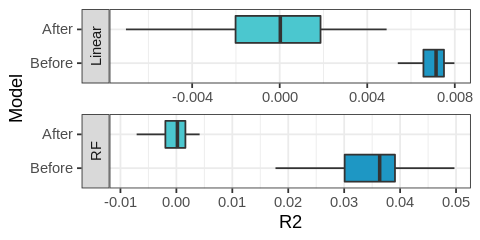

In [6]:
b = read.csv('Data/7.BaseCountryVsRegion_plot.csv')
b$grp = 'Before'
b = subset(b, geo=='Region')
b = b[,2:5]
b = b[,-2]
colnames(b) = c('R2', 'Model', 'grp')

a = read.csv('Data/8.NonRegionCorFullModels.csv')
a = subset(a, Model=='LR' | Model=='RF')
a$Model[1:50] = 'Linear'
a$grp = 'After'
a = a[,2:4]

m = rbind(b,a)

options(repr.plot.width=4, repr.plot.height=2)
ggplot(m, aes(R2, factor(grp, levels = c('Before', 'After')), fill=grp))+
    geom_boxplot(outlier.alpha = 0, width=.8)+
    theme_bw()+
    guides(fill='none')+
    facet_wrap(Model~., scale='free_x', nrow = 2, strip.position="left")+
    scale_fill_manual(values = c('#4BC7CF', '#1E97C4'))+
    ylab('Model')

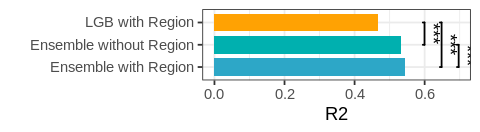

In [7]:
d2 = read.csv('Data/9.Emsemble_sp_pw_merged_performance_result.csv', row.names = 1)

d21 = subset(d2, d2$Model == 'LGB' & d2$Data == 'Species' & d2$Region == 'Region')
d22 = subset(d2, d2$Model == 'EM' & d2$Data == 'Merged')
d2m = rbind(d21, d22)

d212 = d21$R2
d212 = data.frame(d212)
d212$m = 'LGB with Region'
colnames(d212) = c('R2', 'Model')

d221 = subset(d2, d2$Model == 'EM' & d2$Data == 'Merged' & d2$Region == 'Non-Region')$R2
d221 = data.frame(d221)
d221$m = 'Ensemble without Region'
colnames(d221) = c('R2', 'Model')

d222 = subset(d2, d2$Model == 'EM' & d2$Data == 'Merged' & d2$Region == 'Region')$R2
d222 = data.frame(d222)
d222$m = 'Ensemble with Region'
colnames(d222) = c('R2', 'Model')

d2m2 = rbind(d212, d221, d222)

options(repr.plot.width=4, repr.plot.height=1.1)
ggplot(d2m2, aes(R2, Model, fill=Model))+
    geom_bar(stat='summary', fun='mean', position = 'dodge', width = .8)+
    theme_bw()+
    guides(fill='none')+
    geom_signif(comparisons = list(c('LGB with Region', 'Ensemble without Region'),
                                   c('LGB with Region', 'Ensemble with Region'),
                                   c('Ensemble without Region', 'Ensemble with Region')), step_increase = .3, map_signif_level = T, test = wilcox.test)+
    scale_fill_manual(values = c('#2DA7C7', '#00B0AF', '#FFA203'))+
    ylab('')


Warning message:
“Removed 37 rows containing missing values (geom_point).”


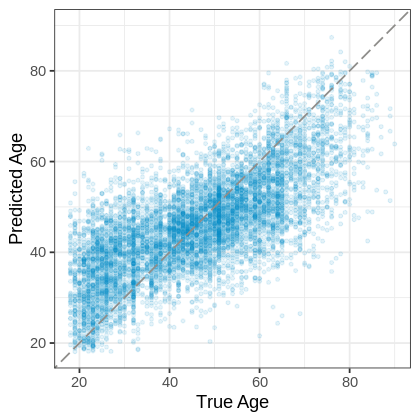

In [8]:
data = read.csv('Data/10.scatter_for_ensemble_model.csv')

options(repr.plot.width=3.5, repr.plot.height=3.5)
ggplot(data, aes(age, pred))+
    geom_point(color='#0092CA', alpha=.1, size=.8)+
    theme_bw()+
    geom_abline(intercept=0, slope=1, color='#8E8D8A', lty='longdash')+
    xlim(18,90)+
    ylim(18,90)+
    xlab('True Age')+
    ylab('Predicted Age')

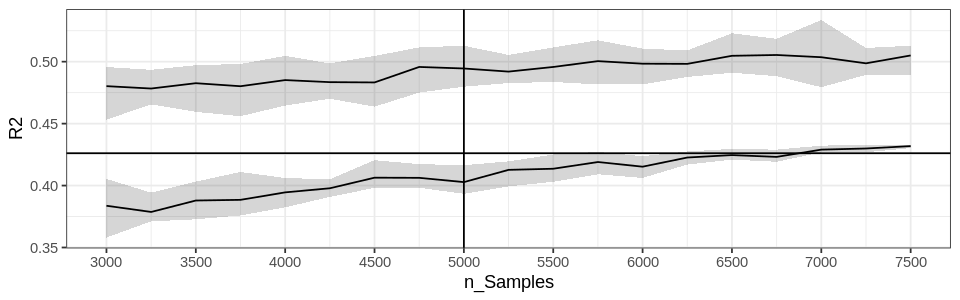

In [9]:
dat1 = read.csv('Data/11.epw_only_plot.csv')
dat2 = read.csv('Data/12.epw_sp_plot.csv')

options(repr.plot.width=8, repr.plot.height=2.5)
ggplot()+
    geom_ribbon(data=dat1, aes(ymin=vMin, ymax=vMax, x=n_Samples), alpha=0.2)+
    geom_line(data=dat1, aes(n_Samples, Mean))+
    geom_hline(yintercept=0.4261129376509644)+
    geom_ribbon(data=dat2, aes(ymin=vMin, ymax=vMax, x=n_Samples), alpha=0.2)+
    geom_line(data=dat2, aes(n_Samples, Mean))+
    geom_vline(xintercept=5000)+
    theme_bw()+
    scale_x_continuous(breaks = seq(3000,7500,500))+
    ylab('R2')